[View in Colaboratory](https://colab.research.google.com/github/divsinha99/Loan_Prediction/blob/master/Loan_prediction_pipeline.ipynb)

In [13]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Loading the data
def load_data():
    return pd.read_csv("train.csv", sep=','), pd.read_csv("test.csv", sep=',')

In [15]:
train_data, test_data = load_data()
train_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


# Check for missing data

We found out that 7 out of 13 columns contain missing data.

In [17]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Exploratory Data Analysis :

Here, we will study the Different Demography Vs Loan status to see which feature decides converting percentage of Loan to get approved, so that the company can specifically target these customers.

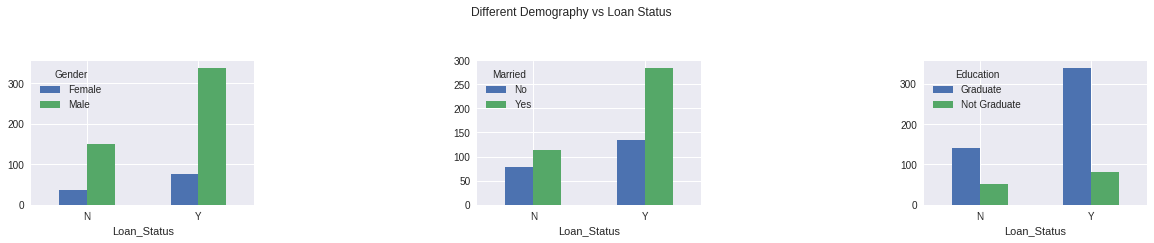

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,3)
fig.set_size_inches(20, 5)
ttl = fig.suptitle('Different Demography vs Loan Status')
ttl.set_position([.5, 1.05])

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.5    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  1.0     # the amount of width reserved for blank space between subplots
hspace = 2 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
df_demo_1 = train_data.groupby(['Loan_Status', 'Gender']).size()
df_demo_1=df_demo_1.unstack(level=1)
df_demo_1.plot(kind = 'bar', ax = ax[0], rot=True)

df_demo_1 = train_data.groupby(['Loan_Status', 'Married']).size()
df_demo_1=df_demo_1.unstack(level=1)
df_demo_1.plot(kind = 'bar', ax = ax[1], rot=True)

df_demo_1 = train_data.groupby(['Loan_Status', 'Education']).size()
df_demo_1=df_demo_1.unstack(level=1)
df_demo_1.plot(kind = 'bar', ax = ax[2], rot=True)

So, from the above plots we can infer the below :

- Gender - We did not see any noticeable difference in loans getting approved between male and female customers applying for home loans. Percentage of loans getting approved are more or less same for both the gender. Another, point to be noted is that - Female segments of the customers are lagging behind while opting for Home Loans as compared to Male, so, the company need to target Female segment of the customers in order to grow their business.

- Married - We can see from the plot that most of the married people opts for such kind of Home Loans and almost 72 % of loan gets converted to 'Approval' status which is definitely more in case of 'Married' segment of the customers as compared to not married. So, Marital status plays an important factor for Home Loans getting approved, which is pretty obvious!!!!

- Education (Graduate/ Non-Graduate) - Percentage of loans getting converted to approved status is more in case of Graduates over Under graduates people. Almost 70% of graduated people applying for loans got it approved. So, Graduated people should be targeted more by the company for offering Home Loans.

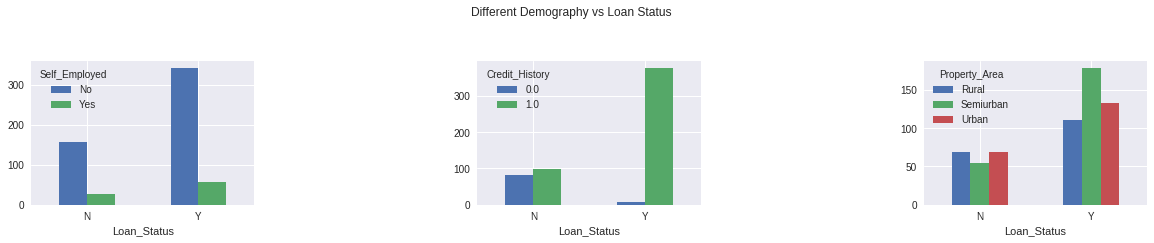

In [19]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20, 5)

ttl = fig.suptitle('Different Demography vs Loan Status')
ttl.set_position([.5, 1.05])

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.5    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  1.0     # the amount of width reserved for blank space between subplots
hspace = 2 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

df_demo_1 = train_data.groupby(['Loan_Status', 'Self_Employed']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', ax = ax[0], rot=True)

df_demo_1 = train_data.groupby(['Loan_Status', 'Credit_History']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', ax = ax[1], rot =True)

df_demo_1 = train_data.groupby(['Loan_Status', 'Property_Area']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', ax = ax[2], rot=True)

Thus, studying the above plots we can infer the following -

- "Self_Employed" - Almost 70% of the Employed/Salaried people who applies for a home loan are eligible for Home Loan. So, the company should target the Salaried segment of the customers or provide some offers/ lower interest rate for such customers to grow their business.

- "Credit_history" - Past data has shown that loan of most of the customers having 0.0 credit hist got declined. So, such segment of customers should generally be avoided while offering loan and target more on customers having credit history of 1.0 to grow their business.

- " Property_Area" (Rural/Semi-Urban/Urban) - Semi urban areas has the most succesful rate for loans getting approved followed by urban and then rural areas.

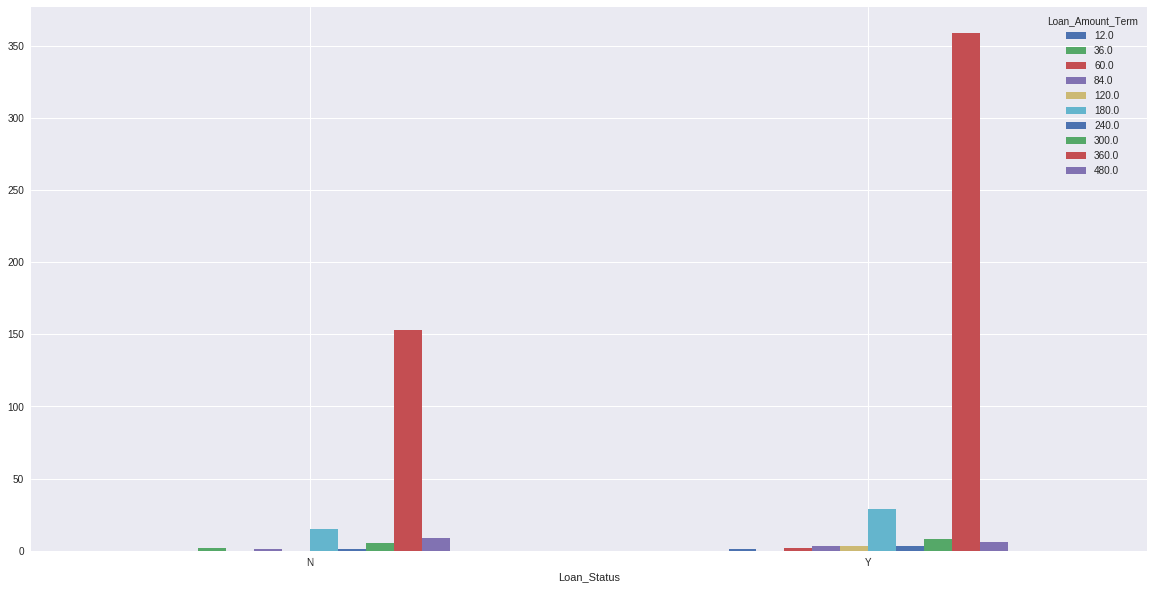

In [20]:
left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.5    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  1.0     # the amount of width reserved for blank space between subplots
hspace = 2 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

df_demo_1 = train_data.groupby(['Loan_Status', 'Loan_Amount_Term']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', figsize = (20, 10), rot=True)

- Loan Amount Term - From Loan amount term we can see that most of the customers opt for 3 years i.e. 36 months home loan, and we can see almost 69% of the customers who opt for such loan term, loan gets approved. However, we can not say that it's an important deciding factor for loans getting approved as almost all the customers opt for 3 yrs loan only.

# Pipeline

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [0]:
train_df = train_data.drop(['Loan_Status'], axis=1)

In [0]:
num_attribs = list(train_df.select_dtypes(include=[np.number]).columns)[0:3]

In [0]:
cat_attribs = list(train_df.select_dtypes(exclude=[np.number]).columns) + list(train_data.select_dtypes(include=[np.number]).columns)[3:]

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer,StandardScaler, LabelBinarizer


imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(num_attribs)),
        ("imputer", Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [107]:
num_pipeline.fit_transform(train_df)

array([[ 0.07299082, -0.55448733, -0.21124125],
       [-0.13441195, -0.03873155, -0.21124125],
       [-0.39374734, -0.55448733, -0.94899647],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847],
       [ 0.35706382, -0.55448733,  0.49081614],
       [-0.13441195, -0.55448733, -0.15174486]])

We will also need an imputer for the string categorical columns (the regular Imputer does not work on those):

In [0]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

We can convert each categorical value to a one-hot vector using a OneHotEncoder.

In [40]:
!pip install sklearn_pandas

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper

In [0]:
mapper = DataFrameMapper(
    [(d, LabelBinarizer()) for d in cat_attribs]
)


cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(cat_attribs)),
        ("imputer", MostFrequentImputer()),
        ("binarizer_mapper", mapper),
    ])

In [110]:
cat_pipeline.fit_transform(train_df)

array([[1, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

Finally, let's join the numerical and categorical pipelines:

In [0]:

from  sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

Now we have a nice preprocessing pipeline that takes the raw data and outputs numerical input features that we can feed to any Machine Learning model we want.

In [112]:
X_train = preprocess_pipeline.fit_transform(train_df)
X_train

array([[ 0.07299082, -0.55448733, -0.21124125, ...,  1.        ,
         0.        ,  1.        ],
       [-0.13441195, -0.03873155, -0.21124125, ...,  1.        ,
         0.        ,  1.        ],
       [-0.39374734, -0.55448733, -0.94899647, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.35706382, -0.55448733,  0.49081614, ...,  1.        ,
         0.        ,  1.        ],
       [-0.13441195, -0.55448733, -0.15174486, ...,  1.        ,
         0.        ,  0.        ]])

Let's not forget to get the labels:

In [0]:
y_train = train_data["Loan_Status"]
y_train_bin = y_train.apply(lambda x: 1 if x== 'Y' else 0)

We are now ready to train a classifier. Let's start with an SVC:

In [116]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

our model is trained, let's use it to make predictions on the test set:

In [0]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

Let's use cross-validation to have an idea of how good our model is.

In [118]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.6873276086390842

In [119]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.7929482175383815

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [89]:


from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, cohen_kappa_score

confusion_matrix(y_train, y_train_pred)

array([[ 86, 106],
       [ 24, 398]])

In [134]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_pred)
print(report)

             precision    recall  f1-score   support

          N       0.78      0.45      0.57       192
          Y       0.79      0.94      0.86       422

avg / total       0.79      0.79      0.77       614



In [94]:

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")
y_probas_forest

array([[0.2, 0.8],
       [0. , 1. ],
       [0.3, 0.7],
       ...,
       [0. , 1. ],
       [0.1, 0.9],
       [0.7, 0.3]])

In [0]:
y_scores_forest  = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_bin,y_scores_forest)

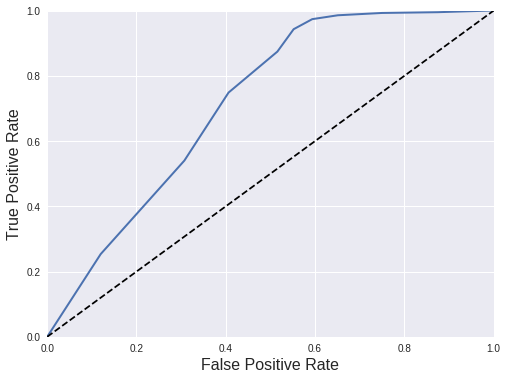

In [127]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest)
#save_fig("roc_curve_plot")
plt.show()

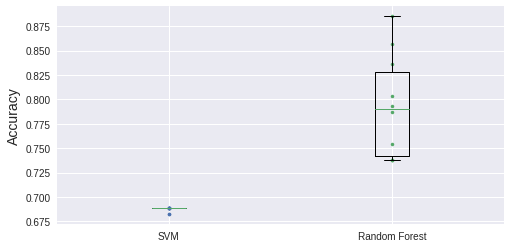

In [66]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()